In [2]:
import functools

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

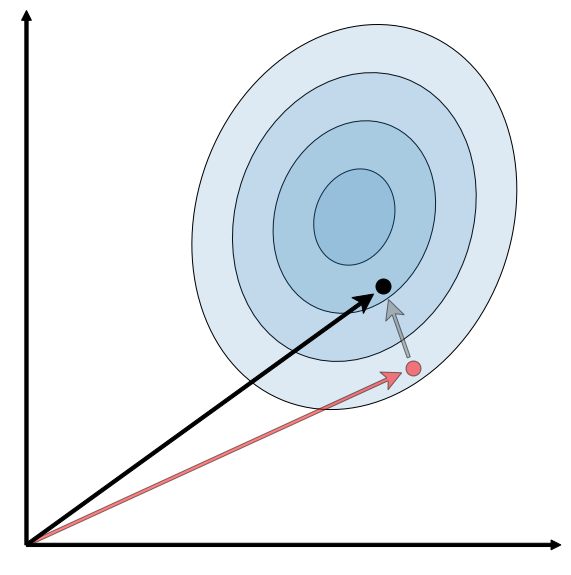

In [3]:
θ = 160
dimensions = [(1.2 * i, i * 1.5) for i in range(5)]
contours = [Ellipse((5, 5), w, h, θ) for w, h in dimensions]
borders = [Ellipse((5, 5), w, h, θ, edgecolor='black', fill=False) for w, h in dimensions]


plt.figure(figsize=(10, 10))
axis = plt.subplot(111, aspect='equal')

for border, contour in zip(borders, contours):
    contour.set_clip_box(axis.bbox)
    contour.set_alpha(0.15)
    axis.add_artist(contour)
    axis.add_artist(border)

size = 0.3
overhang = 0.2
width = 0.05

vector = functools.partial(plt.arrow, overhang=overhang, width=width, head_width=size, head_length=size)
axisline = functools.partial(plt.arrow, width=0.05, head_width=size/2, head_length=size/2, color='black')
point = functools.partial(plt.plot, marker='o', markersize='15', markeredgecolor='black')
# latex = functools.partial(plt.plot, markersize='35', markeredgecolor='black')
alphavector = functools.partial(vector, alpha=0.5)
alphapoint = functools.partial(point, alpha=0.5)

alphavector(0, 0, 5.45, 2.5, facecolor='red') # Xr1
# vector(0, 0, 3.46, 5.98, facecolor='blue') # Xr2
# vector(0, 0, 4.0, 4.4, facecolor='yellow') # Xr3
# alphavector(4.25, 4.95, -0.35, 1, facecolor='green') # diff
# vector(5.83, 2.86, -0.35, 1, facecolor='grey') # scaled
alphavector(5.83, 2.86, -0.21,  0.6, facecolor='grey') # scaled
vector(0, 0, 5.05, 3.65, facecolor='black') # new

alphapoint(5.9, 2.7, color='red')
# point(3.71, 6.41, color='blue')
# point(4.31, 4.78, color='yellow')
point(5.44, 3.95, color='black')

# axes
axisline(0, 0, 0, 8)
axisline(0, 0, 8, 0)

plt.xlim(-0.09, 8.2)
plt.ylim(-0.09, 8.2)
plt.axis('off')
plt.show()

# plt.savefig("diff_evol.png", bbox_inches='tight')

$\Large X_{r1}$

$\Large X_{r2}$

$\Large X_{r3}$

$\Large X_{r2} - X_{r3}$

$\Large \lambda(X_{r2} - X_{r3})$

$\Large X_{r1} + \lambda (X_{r2} - X_{r3})$

In [84]:
from pathlib import Path
from PIL import Image

cwd = Path.cwd()
paths = sorted(p for p in cwd.iterdir() if 'png' in p.suffix and len(p.stem) == 11)
imgs = [Image.open(p) for p in paths]

for i, (img_1, img_2) in enumerate(zip(imgs, imgs[1:])):
    for j, alpha in enumerate(np.linspace(0, 1, 20)):
        img = Image.blend(img_1, img_2, alpha)
        img.save(f'diff_evol_{i:0>2}_{j:0>2}.png')
    else:
        for k in range(44):
            img.save(f'diff_evol_{i:0>2}_{j+k:0>2}.png')

In [86]:
paths = sorted(p for p in cwd.iterdir() if 'png' in p.suffix and len(p.stem) > 11)
imgs = [Image.open(p) for p in paths]

for _ in range(44):
    imgs.insert(0, imgs[0])  # make start last longer

imgs.extend(imgs[::-1])  # make it loop back from end to start
imgs[0].save('diff_evol.gif', save_all=True, append_images=imgs, duration=50, loop=0)